In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def analytical_solution_h_one_side(rch, T, L, x):
    dh = rch / T * (L * x - 0.5 * x**2)
    
    return dh

def analytical_solution_h(rch, T, L, x, dH):
    
    dh = 0.5 * rch/T * x * (L-x) + dH * x /L
    
    return dh

In [175]:
year = 365.25 * 24 * 60 * 60
L = 2000.0
T = 5e-3
rch = 0.25 / year

dH = 2.0
stream_depth = 0.75
rain_depth = 0.75

In [176]:
x = np.linspace(0, L, 10001)


In [177]:
# elevation
Kd = 1.1e-6
U = 1e-4 / year
z = analytical_solution_h_one_side(U, Kd, L, x)

# stream elevation
stream_h = np.ones_like(z) * stream_depth
stream_h[stream_h < z] = np.nan

# 
ind_stream = np.isnan(stream_h) == False
stream_width = x[ind_stream].max()


L_gw = L - stream_width
x_gw = x[ind_stream==False]
z_gw = z[ind_stream==False]
h = analytical_solution_h_one_side(rch, T, L_gw, x_gw - x_gw.min()) + stream_depth



hp = h + rain_depth
hp[hp > z_gw] = z_gw[hp > z_gw]

#
saturated = hp == z_gw
z_saturated = z_gw.copy()
z_saturated[saturated==False] = np.nan


In [178]:
hp.shape, z

((9327,),
 array([0.00000000e+00, 1.15223649e-03, 2.30435775e-03, ...,
        5.76147028e+00, 5.76147045e+00, 5.76147051e+00]))

In [195]:
hpe = np.zeros_like(x)
hpe[ind_stream==False] = h + rain_depth
hpe[ind_stream==True] = stream_h[ind_stream==True] + rain_depth

#hpe[stream_he > hpe] = stream_he[stream_he > hpe]
#ind = np.isnan(stream_h)
#hpe[ind] = hp.min()

In [196]:
stream_h.shape

(10001,)

In [197]:
gwcol = 'darkblue'
precip_col = 'lightblue'
sat_col = 'green'
land_col = 'brown'
stream_col = 'blue'

lws = 2.0

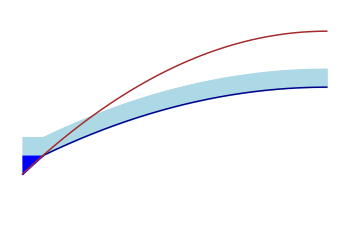

In [198]:
fig, ax = pl.subplots(1, 1)

ax.plot(x_gw, h, color=gwcol)

ax.fill_between(x_gw, h, hpe[ind_stream==False], color=precip_col)
ax.fill_between(x[ind_stream], stream_h[ind_stream], hpe[ind_stream==True], color=precip_col)

ax.plot(x, z, color=land_col)

#ax.plot(x_gw, z_saturated, color=sat_col, lw=lws)

ax.fill_between(x, z, stream_h, color=stream_col)

#xbuf = 1000.0
#ax.set_xlim(-xbuf, L + xbuf)

ybufs = (2.0, 1.0)
ax.set_ylim(z.min() - ybufs[0], z.max() + ybufs[1])

ax.set_axis_off()

fig.savefig('fig/conceptual_model_fig_erosion.svg')

In [ ]:
#hp2 = 

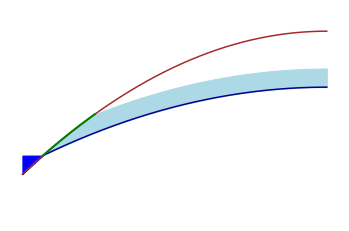

In [199]:
fig, ax = pl.subplots(1, 1)

ax.plot(x_gw, h, color=gwcol)

ax.fill_between(x_gw, h, hp, color=precip_col)

ax.plot(x, z, color=land_col)

ax.plot(x_gw, z_saturated, color=sat_col, lw=lws)

ax.fill_between(x, z, stream_h, color=stream_col)

#xbuf = 1000.0
#ax.set_xlim(-xbuf, L + xbuf)

ybufs = (2.0, 1.0)
ax.set_ylim(z.min() - ybufs[0], z.max() + ybufs[1])

ax.set_axis_off()

fig.savefig('fig/conceptual_model_fig.svg')